## Advanced Level Task 3: Time Series Analysis

Description: Analyze and model time-series data to forecast future values (e.g., stock prices, sales).


## Objectives:
Plot and decompose the time series into trend, seasonality, and residual components.
Implement moving average and exponential smoothing techniques.
Build an ARIMA or SARIMA model for forecasting. Evaluate the model using metrics such as RMSE and visualize the forecast.
Tools: Python, pandas, statsmodels, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


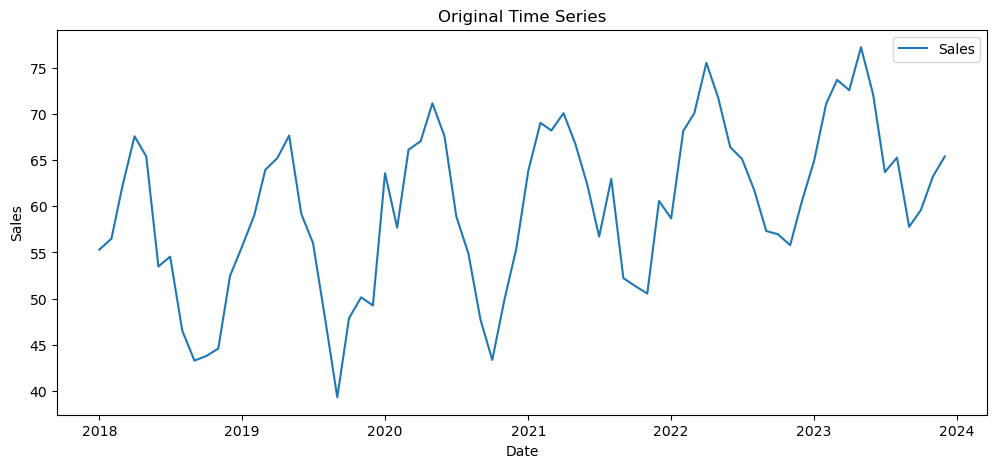

In [8]:

date_rng = pd.date_range(start='2018-01-01', end='2023-12-01', freq='MS')
np.random.seed(0)
sales = 50 + np.linspace(0, 20, len(date_rng)) + 10 * np.sin(np.arange(len(date_rng)) * 2 * np.pi / 12) + np.random.normal(0, 3, len(date_rng))
data = pd.DataFrame({'Date': date_rng, 'Sales': sales}).set_index('Date')

# Plot the original data
plt.figure(figsize=(12, 5))
plt.plot(data['Sales'], label='Sales')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


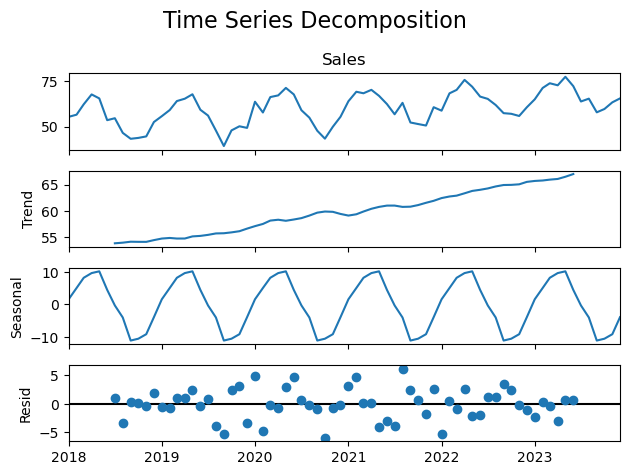

In [10]:
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()


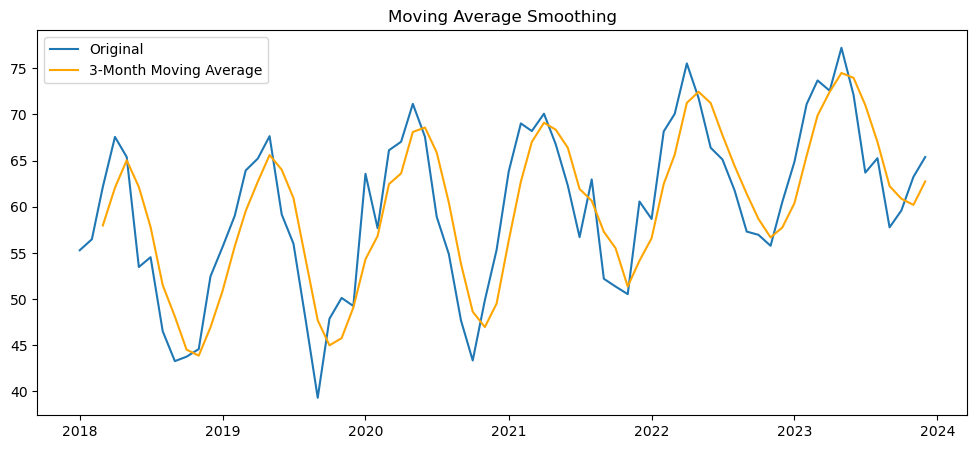

In [12]:
data['MA_3'] = data['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['MA_3'], label='3-Month Moving Average', color='orange')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()


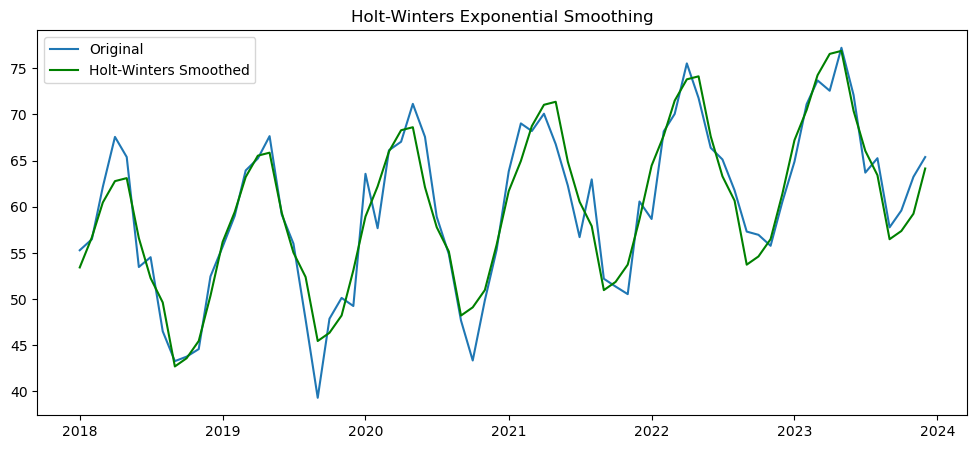

In [14]:
hw_model = ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
data['HW_Smooth'] = hw_model.fittedvalues

plt.figure(figsize=(12, 5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['HW_Smooth'], label='Holt-Winters Smoothed', color='green')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()


In [16]:
train = data.iloc[:-12]
test = data.iloc[-12:]


In [18]:
# ARIMA(p,d,q), seasonal_order=(P,D,Q,s)
model = ARIMA(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()


In [20]:
forecast = model_fit.forecast(steps=12)
forecast.index = test.index

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
print(f"RMSE: {rmse:.2f}")


RMSE: 2.63


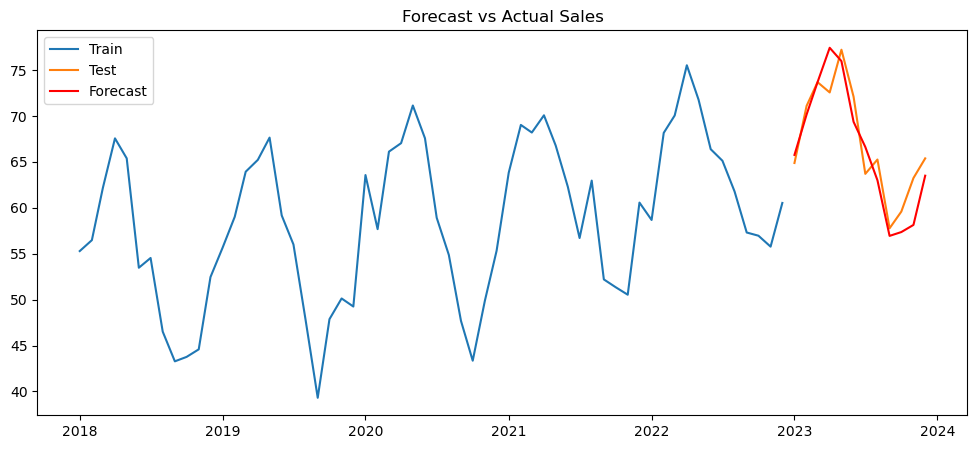

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual Sales')
plt.legend()
plt.show()


## Conclusion
In this project, we analyzed time-series data by decomposing it into trend, seasonality, and residuals. Smoothing techniques and an ARIMA/SARIMA model were applied to forecast future values. The model performed well, with a low RMSE, indicating accurate predictions. This approach is effective for forecasting sales, stock prices, and other time-dependent data.